In [1]:
# Dublin Business School
# @author: Juliana Salvadori
# @Student_number: 10521647
# @Assigment: CA2 - Classification model

In [3]:
import pandas as pd
import math
from matplotlib import pyplot
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import missingno as mno
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [4]:
'''
Load data
######################################
'''

'\nLoad data\n######################################\n'

In [5]:
file_name='nonvoters_data.csv'
data = pd.read_csv(file_name)

In [6]:
'''
Quick Glance
######################################
'''

'\nQuick Glance\n######################################\n'

In [7]:
view = data.head(10)
print(view)

   RespId  weight  Q1  Q2_1  Q2_2  Q2_3  Q2_4  Q2_5  Q2_6  Q2_7  ...  Q30  \
0  470001  0.7516   1     1     1     2     4     1     4     2  ...    2   
1  470002  1.0267   1     1     2     2     3     1     1     2  ...    3   
2  470003  1.0844   1     1     1     2     2     1     1     2  ...    2   
3  470007  0.6817   1     1     1     1     3     1     1     1  ...    2   
4  480008  0.9910   1     1     1    -1     1     1     1     1  ...    1   
5  480009  1.0591   1     3     2     3     4     1     3     3  ...    5   
6  480010  1.1512   1     1     1     2     3     1     1     1  ...    1   
7  470008  1.0174   1     1     1     2     2     1     3     1  ...    2   
8  470010  0.8184   1     1     1     1     3     1     1     1  ...    1   
9  470011  1.1653   1     1     1     2     1     1     1     1  ...    3   

   Q31  Q32  Q33  ppage                 educ         race  gender  \
0  NaN  1.0  NaN     73              College        White  Female   
1  NaN  NaN  1

In [8]:
# There are some columns that can be removed as they are not relevant for 
# classification process (RespID and weight) 
# Also, there some columns with too many NA values, can those columns be removed?

In [9]:
'''
Review Dimensions of the data
######################################
'''

'\nReview Dimensions of the data\n######################################\n'

In [10]:
dim = data.shape
print(dim)

(5836, 119)


In [11]:
# dataset has 5836 rows and 119 columns (118 features and 1 label)
# so, for that amount of rows we should use at maximum 6 features to
# apply machine learning algorithm
# that means, we can remove those columns with too many NA values
# as they probably will not be relevant for classification

In [12]:
'''
Clean data
######################################
'''

'\nClean data\n######################################\n'

In [13]:
# Remove first (RespID) and second (weight) columns 
data = data.drop(['RespId', 'weight'], axis=1) # axis=1 dennotates column

# Remove other columns where there are lots of missing data (NA)
data = data.drop(['Q22','Q29_1', 'Q29_2','Q29_3','Q29_4','Q29_5','Q29_6','Q29_7','Q29_8','Q29_9','Q29_10','Q31','Q32','Q33'], axis=1)

# Column Q1 has always value as 1 and 
# so it will not impact classification
data = data.drop(['Q1'], axis=1)

# Remove other columns where most of the answers are -1 (NA)
data = data.drop(['Q19_1','Q19_2','Q19_3','Q19_4','Q19_5','Q19_6','Q19_7','Q19_8','Q19_9','Q19_10',], axis=1)
data = data.drop(['Q28_1','Q28_2','Q28_3','Q28_4','Q28_5','Q28_6','Q28_7','Q28_8'], axis=1)


In [14]:
# Review data
view = data.head(10)
print(view)

   Q2_1  Q2_2  Q2_3  Q2_4  Q2_5  Q2_6  Q2_7  Q2_8  Q2_9  Q2_10  ...  Q27_4  \
0     1     1     2     4     1     4     2     2     4      2  ...      1   
1     1     2     2     3     1     1     2     1     1      3  ...      1   
2     1     1     2     2     1     1     2     1     4      3  ...      1   
3     1     1     1     3     1     1     1     1     1      2  ...      1   
4     1     1    -1     1     1     1     1     1     1      1  ...      1   
5     3     2     3     4     1     3     3     1     1      4  ...      2   
6     1     1     2     3     1     1     1     1     1      3  ...      1   
7     1     1     2     2     1     3     1     1     4      2  ...      1   
8     1     1     1     3     1     1     1     1     3      2  ...      1   
9     1     1     2     1     1     1     1     2     1      2  ...      1   

   Q27_5  Q27_6  Q30  ppage                 educ         race  gender  \
0      1      1    2     73              College        White  Femal

In [15]:
'''
Review data types
######################################
'''

'\nReview data types\n######################################\n'

In [16]:
types = data.dtypes
print(types)

Q2_1               int64
Q2_2               int64
Q2_3               int64
Q2_4               int64
Q2_5               int64
Q2_6               int64
Q2_7               int64
Q2_8               int64
Q2_9               int64
Q2_10              int64
Q3_1               int64
Q3_2               int64
Q3_3               int64
Q3_4               int64
Q3_5               int64
Q3_6               int64
Q4_1               int64
Q4_2               int64
Q4_3               int64
Q4_4               int64
Q4_5               int64
Q4_6               int64
Q5                 int64
Q6                 int64
Q7                 int64
Q8_1               int64
Q8_2               int64
Q8_3               int64
Q8_4               int64
Q8_5               int64
                   ...  
Q17_4              int64
Q18_1              int64
Q18_2              int64
Q18_3              int64
Q18_4              int64
Q18_5              int64
Q18_6              int64
Q18_7              int64
Q18_8              int64


In [17]:
# There are a few columns which the data type is object (string),
# and therefore, they need to be converted to integer values
# educ               object
# race               object
# gender             object
# income_cat         object
# voter_category     object

In [18]:
############################################
# Highest educational attainment category
educ_count = data.groupby('educ').size()
print (educ_count)

educ
College                2330
High school or less    1796
Some college           1710
dtype: int64


In [19]:
# There are 3 options for education
# High school or less    => 1
# Some college           => 2
# College                => 3

In [20]:
def set_educ_int (row):
   if row['educ'] == 'High school or less' :
      return 1
   if row['educ'] == 'Some college':
      return 2
   if row['educ'] == 'College' :
      return 3   
   return 0

In [21]:
data["educ_int"] = data.apply (lambda row: set_educ_int(row), axis=1)
view = data.loc[ :, ['educ', 'educ_int']]
print(view.head(10))

                  educ  educ_int
0              College         3
1              College         3
2              College         3
3         Some college         2
4  High school or less         1
5  High school or less         1
6  High school or less         1
7         Some college         2
8              College         3
9         Some college         2


In [22]:
# Remove educ column
data = data.drop(['educ'], axis=1)

In [23]:
############################################
# Race of respondent
race_count = data.groupby('race').size()
print (race_count)

race
Black           932
Hispanic        813
Other/Mixed     381
White          3710
dtype: int64


In [24]:
# There are 4 options for race
# Black           => 1
# Hispanic        => 2
# White           => 3
# Other/Mixed     => 4

In [25]:
def set_race_int (row):
   if row['race'] == 'Black' :
      return 1
   if row['race'] == 'Hispanic':
      return 2
   if row['race'] == 'White' :
      return 3   
   if row['race'] == 'Other/Mixed' :
      return 4   
   return 0

In [26]:
data["race_int"] = data.apply (lambda row: set_race_int(row), axis=1)
view = data.loc[ :, ['race', 'race_int']]
print(view.head(10))

          race  race_int
0        White         3
1        White         3
2        White         3
3        Black         1
4        White         3
5        White         3
6        White         3
7  Other/Mixed         4
8        White         3
9        White         3


In [27]:
# Remove race column
data = data.drop(['race'], axis=1)

In [28]:
############################################
# Gender of respondent
gender_count = data.groupby('gender').size()
print (gender_count)

gender
Female    2896
Male      2940
dtype: int64


In [29]:
# There are 2 options for gender
# Female    => 1
# Male      => 2

In [30]:
def set_gender_int (row):
   if row['gender'] == 'Female' :
      return 1
   if row['gender'] == 'Male':
      return 2   
   return 0

In [31]:
data["gender_int"] = data.apply (lambda row: set_gender_int(row), axis=1)
view = data.loc[ :, ['gender', 'gender_int']]
print(view.head(10))

   gender  gender_int
0  Female           1
1  Female           1
2    Male           2
3  Female           1
4    Male           2
5  Female           1
6  Female           1
7  Female           1
8    Male           2
9    Male           2


In [32]:
# Remove gender column
data = data.drop(['gender'], axis=1)

In [33]:
############################################
# Household income category of respondent
income_count = data.groupby('income_cat').size()
print (income_count)

income_cat
$125k or more     1394
$40-75k           1396
$75-125k          1628
Less than $40k    1418
dtype: int64


In [34]:
# There are 4 options for gender
# Less than $40k    => 1
# $40-75k           => 2
# $75-125k          => 3
# $125k or more     => 4

In [35]:
def set_income_int (row):
   if row['income_cat'] == 'Less than $40k' :
      return 1
   if row['income_cat'] == '$40-75k':
      return 2   
   if row['income_cat'] == '$75-125k':
      return 3   
   if row['income_cat'] == '$125k or more':
      return 4   
   return 0

In [36]:
data["income_int"] = data.apply (lambda row: set_income_int(row), axis=1)
view = data.loc[ :, ['income_cat', 'income_int']]
print(view.head(10))

      income_cat  income_int
0       $75-125k           3
1  $125k or more           4
2  $125k or more           4
3        $40-75k           2
4        $40-75k           2
5        $40-75k           2
6  $125k or more           4
7       $75-125k           3
8  $125k or more           4
9  $125k or more           4


In [37]:
# Remove income_cat column
data = data.drop(['income_cat'], axis=1)

In [38]:
############################################
# Voter category
voter_cat_count = data.groupby('voter_category').size()
print (voter_cat_count)

voter_category
always          1811
rarely/never    1451
sporadic        2574
dtype: int64


In [39]:
# There are 3 options for gender
# rarely/never    => 1
# sporadic        => 2
# always          => 3

In [40]:
def set_voter_cat_int (row):
   if row['voter_category'] == 'rarely/never' :
      return 1
   if row['voter_category'] == 'sporadic':
      return 2   
   if row['voter_category'] == 'always':
      return 3   
   return 0

In [41]:
data["voter_cat_int"] = data.apply (lambda row: set_voter_cat_int(row), axis=1)
view = data.loc[ :, ['voter_category', 'voter_cat_int']]
print(view.head(10))

  voter_category  voter_cat_int
0         always              3
1         always              3
2       sporadic              2
3       sporadic              2
4         always              3
5   rarely/never              1
6         always              3
7         always              3
8         always              3
9         always              3


In [42]:
# Remove voter_category column
data = data.drop(['voter_category'], axis=1)

In [43]:
# review data
view = data.head(10)
print(view)

   Q2_1  Q2_2  Q2_3  Q2_4  Q2_5  Q2_6  Q2_7  Q2_8  Q2_9  Q2_10  ...  Q27_4  \
0     1     1     2     4     1     4     2     2     4      2  ...      1   
1     1     2     2     3     1     1     2     1     1      3  ...      1   
2     1     1     2     2     1     1     2     1     4      3  ...      1   
3     1     1     1     3     1     1     1     1     1      2  ...      1   
4     1     1    -1     1     1     1     1     1     1      1  ...      1   
5     3     2     3     4     1     3     3     1     1      4  ...      2   
6     1     1     2     3     1     1     1     1     1      3  ...      1   
7     1     1     2     2     1     3     1     1     4      2  ...      1   
8     1     1     1     3     1     1     1     1     3      2  ...      1   
9     1     1     2     1     1     1     1     2     1      2  ...      1   

   Q27_5  Q27_6  Q30  ppage  educ_int  race_int  gender_int  income_int  \
0      1      1    2     73         3         3           1       

In [44]:
'''
Data Description
######################################
'''

'\nData Description\n######################################\n'

In [45]:
# limiting the results upto two possible digits after decimals 
pd.set_option('precision', 2)

In [46]:
# lists the number of non-null values and the datatype of each variable.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5836 entries, 0 to 5835
Data columns (total 84 columns):
Q2_1             5836 non-null int64
Q2_2             5836 non-null int64
Q2_3             5836 non-null int64
Q2_4             5836 non-null int64
Q2_5             5836 non-null int64
Q2_6             5836 non-null int64
Q2_7             5836 non-null int64
Q2_8             5836 non-null int64
Q2_9             5836 non-null int64
Q2_10            5836 non-null int64
Q3_1             5836 non-null int64
Q3_2             5836 non-null int64
Q3_3             5836 non-null int64
Q3_4             5836 non-null int64
Q3_5             5836 non-null int64
Q3_6             5836 non-null int64
Q4_1             5836 non-null int64
Q4_2             5836 non-null int64
Q4_3             5836 non-null int64
Q4_4             5836 non-null int64
Q4_5             5836 non-null int64
Q4_6             5836 non-null int64
Q5               5836 non-null int64
Q6               5836 non-null int64
Q7   

In [47]:
# it shows that at this stage there is no NA values as all the
# features are listed as 5836 non-null rows 

In [48]:
# summary of statistics for the given dataset
description = data.describe()
print(description)

          Q2_1     Q2_2     Q2_3     Q2_4     Q2_5     Q2_6     Q2_7     Q2_8  \
count  5836.00  5836.00  5836.00  5836.00  5836.00  5836.00  5836.00  5836.00   
mean      1.25     1.71     1.64     2.18     1.28     1.81     1.49     1.46   
std       0.66     0.87     0.77     1.09     0.63     1.01     0.81     0.67   
min      -1.00    -1.00    -1.00    -1.00    -1.00    -1.00    -1.00    -1.00   
25%       1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00   
50%       1.00     2.00     2.00     2.00     1.00     1.00     1.00     1.00   
75%       1.00     2.00     2.00     3.00     1.00     2.00     2.00     2.00   
max       4.00     4.00     4.00     4.00     4.00     4.00     4.00     4.00   

          Q2_9    Q2_10  ...    Q27_4    Q27_5    Q27_6      Q30    ppage  \
count  5836.00  5836.00  ...  5836.00  5836.00  5836.00  5836.00  5836.00   
mean      2.09     2.02  ...     1.21     1.36     1.27     2.33    51.69   
std       1.25     0.95  ...     0.47  

In [49]:
# this summary shows that even that there is no NA values
# some of the features have min value as -1, which is 
# not a valid value and it will probably require to be removed
# or replaced, first let's see more information about the features

In [50]:
'''
Class distribution
######################################
'''

'\nClass distribution\n######################################\n'

In [51]:
voter_cat_count = data.groupby('voter_cat_int').size()
print (voter_cat_count)

voter_cat_int
1    1451
2    2574
3    1811
dtype: int64


In [52]:
'''
Data Skew
######################################
'''

'\nData Skew\n######################################\n'

In [53]:
skew_data = data.skew()
print(skew_data.head(40))
print(skew_data.tail(45))

Q2_1     2.36
Q2_2     0.82
Q2_3     0.75
Q2_4     0.24
Q2_5     1.99
Q2_6     0.79
Q2_7     1.21
Q2_8     1.05
Q2_9     0.44
Q2_10    0.36
Q3_1     0.67
Q3_2    -0.03
Q3_3    -0.36
Q3_4     0.68
Q3_5     0.15
Q3_6     0.38
Q4_1     0.66
Q4_2     0.59
Q4_3     0.37
Q4_4    -0.08
Q4_5     0.04
Q4_6     0.37
Q5       0.65
Q6      -0.79
Q7      -0.02
Q8_1    -0.42
Q8_2    -0.57
Q8_3     0.16
Q8_4     0.42
Q8_5    -0.22
Q8_6     0.24
Q8_7    -0.42
Q8_8     0.51
Q8_9     0.52
Q9_1     0.74
Q9_2    -0.38
Q9_3    -1.44
Q9_4    -2.18
Q10_1   -4.39
Q10_2   -2.17
dtype: float64
Q10_2            -2.17
Q10_3            -2.57
Q10_4           -14.22
Q11_1            -3.02
Q11_2            -9.18
Q11_3            -0.79
Q11_4            -2.78
Q11_5            -1.77
Q11_6            -9.75
Q14               0.09
Q15               0.50
Q16               0.70
Q17_1             0.76
Q17_2             0.77
Q17_3             0.05
Q17_4            -0.50
Q18_1            -7.44
Q18_2            -5.98
Q18_3      

In [54]:
'''
Histogram to visually verify the skew
for each feature
(Univariate plot)
######################################
'''
#fig = pyplot.figure(figsize = (20,20))
#ax = fig.add_subplot(111)
#data.hist(ax = ax)

# there are still too many features to plot, so, let's use only density plot

'\nHistogram to visually verify the skew\nfor each feature\n(Univariate plot)\n######################################\n'

In [55]:
'''
Density plot
(Univariate plot)
######################################
'''

'\nDensity plot\n(Univariate plot)\n######################################\n'

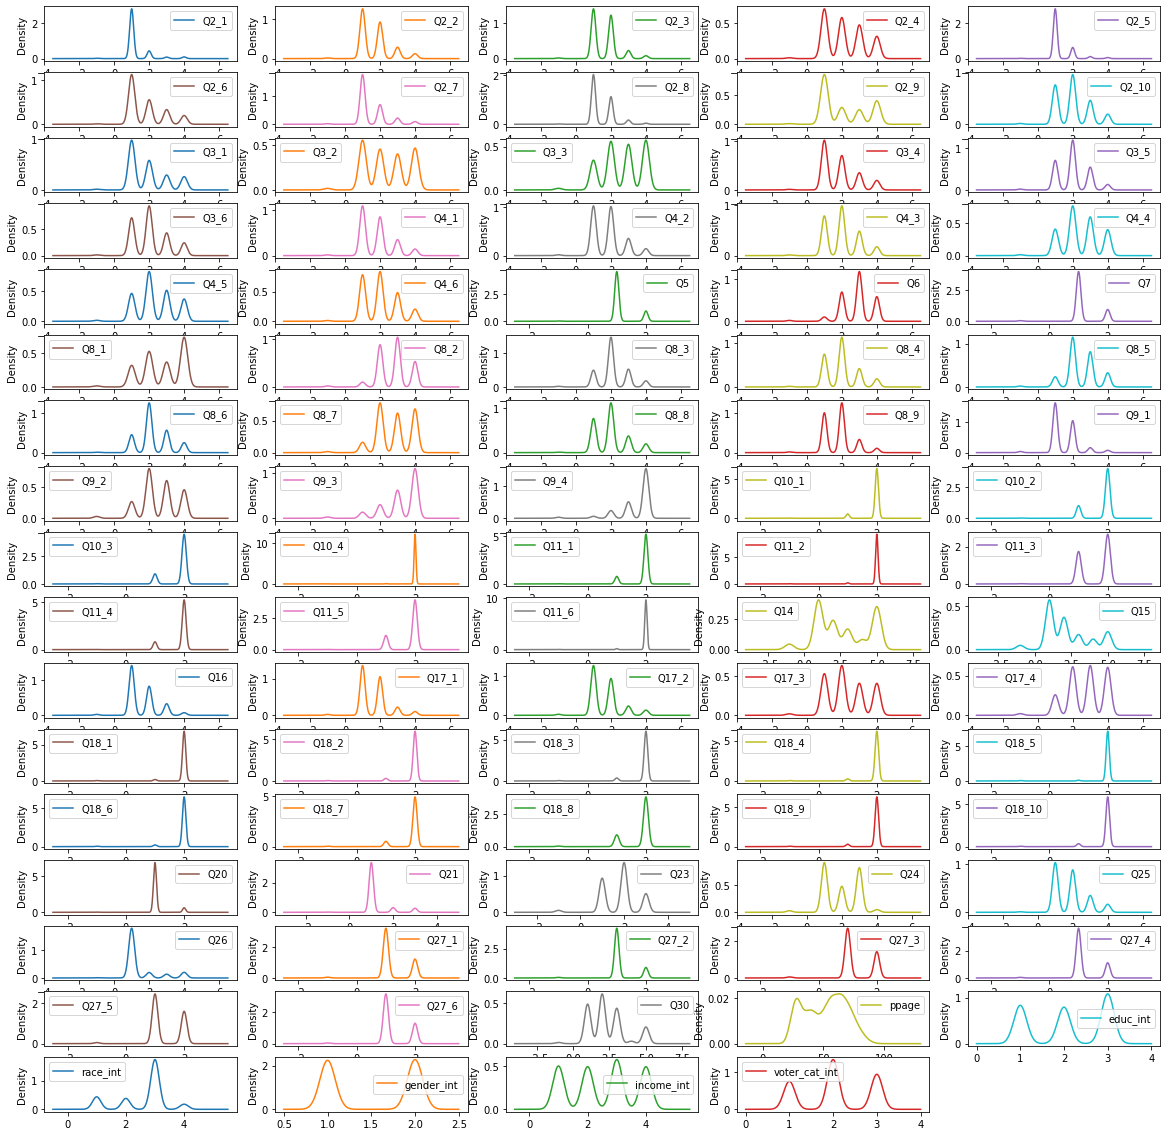

In [56]:
K = data.plot(kind='density', figsize=(20,30),subplots=True,layout=(25,5),sharex=False,sharey=False)

In [57]:
# based on data skewness and density plot results it's possible to reduce the number of features
data1 = data.loc[ :, ['educ_int','gender_int','income_int','ppage','Q11_3','Q14','Q15','Q16','Q17_1','Q17_2','Q17_3','Q17_4','Q2_10','Q2_2'	,'Q2_3'	,'Q2_4'	,'Q2_6'	,'Q2_8'	,'Q2_9'	,'Q23','Q24','Q25','Q27_1','Q27_2','Q27_3','Q27_4','Q27_5','Q27_6','Q3_1'	,'Q3_2'	,'Q3_3'	,'Q3_4'	,'Q3_5'	,'Q3_6'	,'Q30','Q4_1'	,'Q4_2'	,'Q4_3'	,'Q4_4'	,'Q4_5'	,'Q4_6'	,'Q5','Q6','Q7','Q8_1'	,'Q8_2'	,'Q8_3'	,'Q8_4'	,'Q8_5'	,'Q8_6'	,'Q8_7'	,'Q8_8'	,'Q8_9'	,'Q9_1'	,'Q9_2'	,'race_int', 'voter_cat_int']]

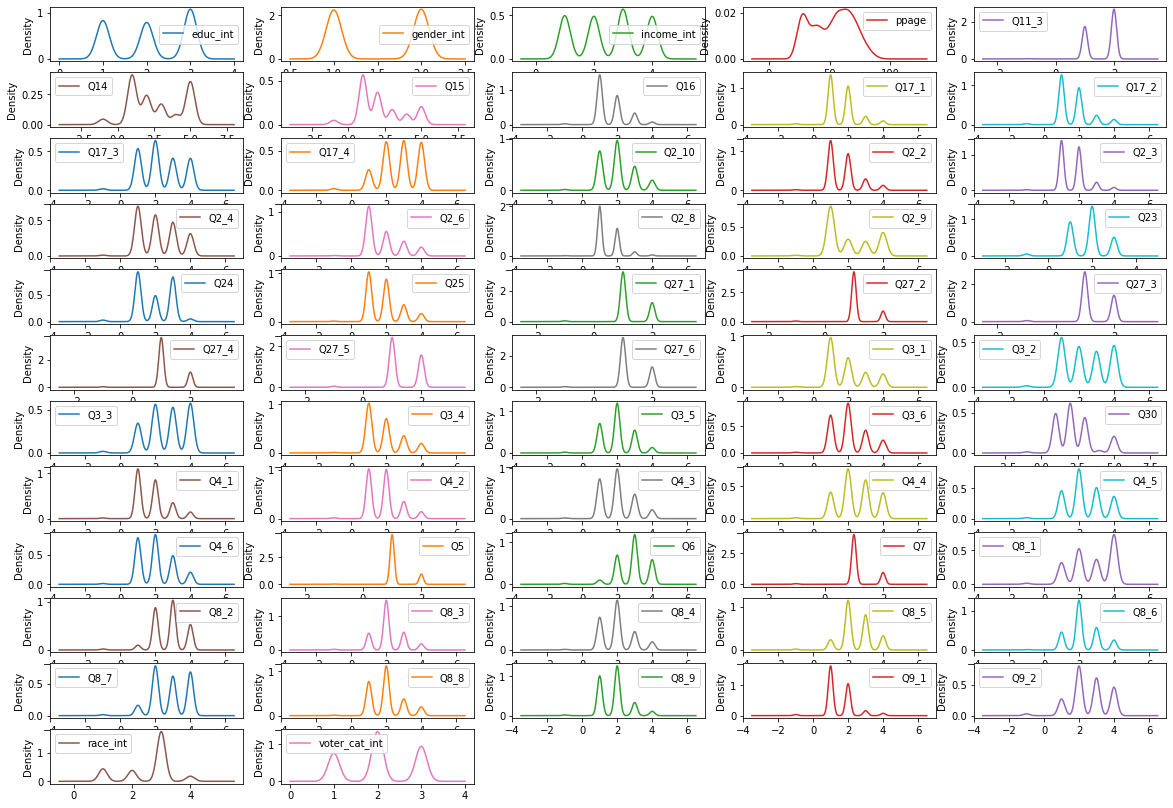

In [58]:
# review the density plot for the new set of features
K = data1.plot(kind='density', figsize=(20,30),subplots=True,layout=(25,5),sharex=False,sharey=False)

In [59]:
# New glance to the data
view = data1.head(10)
print(view)
print(data1.shape)
# 56 features + 1 label

   educ_int  gender_int  income_int  ppage  Q11_3  Q14  Q15  Q16  Q17_1  \
0         3           1           3     73      2    5    1    1      1   
1         3           1           4     90      1    1    1    2      2   
2         3           2           4     53      1    5    2    1      1   
3         2           1           2     58      2    5    1    4      1   
4         1           2           2     81      1    1    5    1      2   
5         1           1           2     61      2   -1   -1   -1     -1   
6         1           1           4     80      2    1    3    3      3   
7         2           1           3     68      2    5    1    1      1   
8         3           2           4     70      2    2    4    1      2   
9         2           2           4     83      1    1    5    3      2   

   Q17_2  ...  Q8_4  Q8_5  Q8_6  Q8_7  Q8_8  Q8_9  Q9_1  Q9_2  race_int  \
0      1  ...     1     1     1     1     2     4     2     2         3   
1      2  ...     2     

In [60]:
'''
Data Description review
######################################
'''

'\nData Description review\n######################################\n'

In [61]:
# set options to display all columns of the dataset
pd.options.display.max_columns = data1.shape[1]

In [62]:
# summary of statistics for the given dataset
description = data1.describe()
print(description)

       educ_int  gender_int  income_int    ppage    Q11_3      Q14      Q15  \
count   5836.00      5836.0     5836.00  5836.00  5836.00  5836.00  5836.00   
mean       2.09         1.5        2.51    51.69     1.60     2.65     2.21   
std        0.84         0.5        1.10    17.07     0.51     1.74     1.52   
min        1.00         1.0        1.00    22.00    -1.00    -1.00    -1.00   
25%        1.00         1.0        2.00    36.00     1.00     1.00     1.00   
50%        2.00         2.0        3.00    54.00     2.00     2.00     2.00   
75%        3.00         2.0        3.00    65.00     2.00     5.00     3.00   
max        3.00         2.0        4.00    94.00     2.00     5.00     5.00   

           Q16    Q17_1    Q17_2    Q17_3    Q17_4    Q2_10     Q2_2     Q2_3  \
count  5836.00  5836.00  5836.00  5836.00  5836.00  5836.00  5836.00  5836.00   
mean      1.62     1.64     1.68     2.32     2.71     2.02     1.71     1.64   
std       0.84     0.82     0.88     1.13    

In [63]:
# the summary shows that there are still features where min value is -1, 
# which is not valid and it will probably require them to be replaced or removed 
# before being able to use correlation and/or feature selection

In [64]:
# which columns have min as -1?
## extract min row as series
row = description.iloc[3]    

In [65]:
## filter for values equal to -1 and get columns via index
invalidMin = row[row == -1].index  
print(invalidMin)

Index(['Q11_3', 'Q14', 'Q15', 'Q16', 'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4',
       'Q2_10', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_6', 'Q2_8', 'Q2_9', 'Q23', 'Q24',
       'Q25', 'Q27_1', 'Q27_2', 'Q27_3', 'Q27_4', 'Q27_5', 'Q27_6', 'Q3_1',
       'Q3_2', 'Q3_3', 'Q3_4', 'Q3_5', 'Q3_6', 'Q30', 'Q4_1', 'Q4_2', 'Q4_3',
       'Q4_4', 'Q4_5', 'Q4_6', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3',
       'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q9_1', 'Q9_2'],
      dtype='object')


In [66]:
# let's replace those -1 values for NA
for i in invalidMin:
    #print('index {}'.format(i))
    data1.loc[data1[i] == -1, i] = np.NAN          

In [67]:
# let's have a look at data
view = data1.head(10)
print(view)

   educ_int  gender_int  income_int  ppage  Q11_3  Q14  Q15  Q16  Q17_1  \
0         3           1           3     73    2.0  5.0  1.0  1.0    1.0   
1         3           1           4     90    1.0  1.0  1.0  2.0    2.0   
2         3           2           4     53    1.0  5.0  2.0  1.0    1.0   
3         2           1           2     58    2.0  5.0  1.0  4.0    1.0   
4         1           2           2     81    1.0  1.0  5.0  1.0    2.0   
5         1           1           2     61    2.0  NaN  NaN  NaN    NaN   
6         1           1           4     80    2.0  1.0  3.0  3.0    3.0   
7         2           1           3     68    2.0  5.0  1.0  1.0    1.0   
8         3           2           4     70    2.0  2.0  4.0  1.0    2.0   
9         2           2           4     83    1.0  1.0  5.0  3.0    2.0   

   Q17_2  Q17_3  Q17_4  Q2_10  Q2_2  Q2_3  Q2_4  Q2_6  Q2_8  Q2_9  Q23  Q24  \
0    1.0    1.0    3.0    2.0   1.0   2.0   4.0   4.0   2.0   4.0  2.0  1.0   
1    2.0    2.0 

In [68]:
# check how many NaN values for each feature
data1.isnull().sum()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5836 entries, 0 to 5835
Data columns (total 57 columns):
educ_int         5836 non-null int64
gender_int       5836 non-null int64
income_int       5836 non-null int64
ppage            5836 non-null int64
Q11_3            5815 non-null float64
Q14              5632 non-null float64
Q15              5644 non-null float64
Q16              5780 non-null float64
Q17_1            5782 non-null float64
Q17_2            5777 non-null float64
Q17_3            5781 non-null float64
Q17_4            5779 non-null float64
Q2_10            5798 non-null float64
Q2_2             5800 non-null float64
Q2_3             5800 non-null float64
Q2_4             5802 non-null float64
Q2_6             5805 non-null float64
Q2_8             5810 non-null float64
Q2_9             5800 non-null float64
Q23              5727 non-null float64
Q24              5763 non-null float64
Q25              5809 non-null float64
Q27_1            5769 non-null float64
Q27_

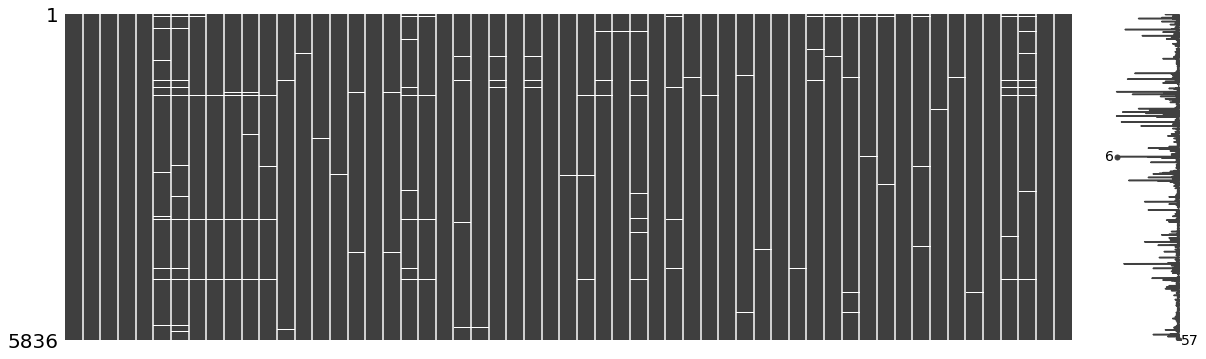

In [69]:
# let's visualize the missing values
mno.matrix(data1, figsize = (20, 6))

In [70]:
# let's check the impact on the dataset size if the lines with NA values are removed
print(len(data1))     
print(len(data1.dropna()))

5836
5019


In [71]:
# actual size = 5836
# removing NA values = 5019
# the difference is not significant, we will still have enough data
# so, instead of imput the missing values let's remove those lines

In [72]:
data1 = data1.dropna()
# check how many NaN values for each feature
data1.isnull().sum()

educ_int         0
gender_int       0
income_int       0
ppage            0
Q11_3            0
Q14              0
Q15              0
Q16              0
Q17_1            0
Q17_2            0
Q17_3            0
Q17_4            0
Q2_10            0
Q2_2             0
Q2_3             0
Q2_4             0
Q2_6             0
Q2_8             0
Q2_9             0
Q23              0
Q24              0
Q25              0
Q27_1            0
Q27_2            0
Q27_3            0
Q27_4            0
Q27_5            0
Q27_6            0
Q3_1             0
Q3_2             0
Q3_3             0
Q3_4             0
Q3_5             0
Q3_6             0
Q30              0
Q4_1             0
Q4_2             0
Q4_3             0
Q4_4             0
Q4_5             0
Q4_6             0
Q5               0
Q6               0
Q7               0
Q8_1             0
Q8_2             0
Q8_3             0
Q8_4             0
Q8_5             0
Q8_6             0
Q8_7             0
Q8_8             0
Q8_9        

In [77]:
'''
Correlations matrix between Attributes
(Multivariate plot)
######################################
'''
correlations = data1.corr()

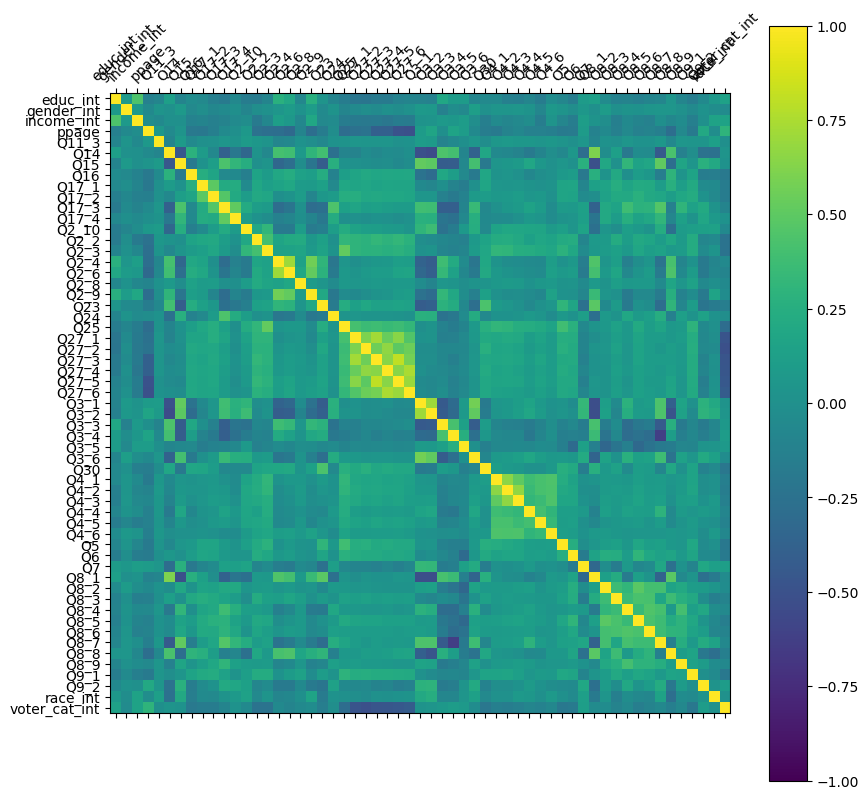

In [79]:
col_names = list(data1)
# plot correlation matrix
fig = pyplot.figure(figsize=(10,10), dpi=100)
# 111: 1x1 grid, first subplot
ax = fig.add_subplot(111)
# normalize data using vmin, vmax
cax = ax.matshow(correlations, vmin=-1, vmax=1)
# add a colorbar to a plot.
fig.colorbar(cax)
# force matplotlib to use enough xticks so that all labels can be shown
ax.set_xticks(np.arange(len(col_names)))
ax.set_yticks(np.arange(len(col_names)))
# set x and y tick marks
ax.set_xticklabels(col_names, rotation=45)
ax.set_yticklabels(col_names)
# draw a matrix using the correlations data
pyplot.show()

In [80]:
# too much information to be able to select through the correlation matrix

In [81]:
'''
Data normalization
######################################
'''
# As all the features are categorical there is no need for normalization 

'\nData normalization\n######################################\n'

In [82]:
dim = data1.shape
print(dim)

(5019, 57)


In [83]:
'''
Feature Extraction with Univariate Statistical Tests 
(Chi-squared for classification)
######################################
'''

'\nFeature Extraction with Univariate Statistical Tests \n(Chi-squared for classification)\n######################################\n'

In [84]:
# chose the best K
bestK = int(round(math.sqrt(dim[1]))) + 1
print(bestK)

9


In [85]:
array = data1.values
X = array[:,0:56]
Y = array[:,56]

In [86]:
# feature extraction
test = SelectKBest(score_func = chi2, k = bestK)
fit = test.fit(X, Y)

In [87]:
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
score = fit.scores_.tolist()

[3.705e+01 1.503e+00 6.793e+01 2.931e+03 1.804e-01 6.075e+00 2.610e+00
 8.969e+01 5.288e+01 6.077e+01 2.360e+01 9.705e-01 9.720e+00 1.288e+02
 1.000e+02 8.118e+00 2.993e+01 4.490e+00 6.713e+00 3.116e+01 7.677e-01
 2.054e+02 2.140e+02 2.180e+02 2.213e+02 2.361e+02 2.106e+02 2.173e+02
 1.717e+00 7.062e+00 1.018e+01 2.935e+01 1.037e+01 1.828e+00 1.468e+02
 4.369e+01 5.162e+01 3.355e+01 1.589e+01 2.811e+01 1.422e+01 2.706e+01
 3.841e+01 9.102e+00 3.235e+00 1.061e+00 1.959e+01 7.022e+00 3.198e+01
 2.009e+01 7.972e+00 4.022e+01 7.982e+00 7.158e+01 2.006e+01 4.547e-01]


In [88]:
# let's use the top 5 features with the highest scores
col_names = list(data1)
for a, b in zip(col_names, score):
    print(a, b)    

educ_int 37.05459512368649
gender_int 1.5032236263148777
income_int 67.93467605558563
ppage 2930.82137354569
Q11_3 0.1803953441915017
Q14 6.0754262416445135
Q15 2.610157283357681
Q16 89.68732519621007
Q17_1 52.878999797470584
Q17_2 60.766226492883774
Q17_3 23.602263924616313
Q17_4 0.9705158328077343
Q2_10 9.7197267308543
Q2_2 128.82426811911293
Q2_3 100.02034204965729
Q2_4 8.11840581532813
Q2_6 29.933469273981533
Q2_8 4.489968184573574
Q2_9 6.713126380387995
Q23 31.157603378316377
Q24 0.7677498120041357
Q25 205.40401017038812
Q27_1 213.9802858364262
Q27_2 218.01109056933393
Q27_3 221.32622911013794
Q27_4 236.0515465872607
Q27_5 210.59219372632123
Q27_6 217.2500833611505
Q3_1 1.7169184162647864
Q3_2 7.062411801255097
Q3_3 10.184618514290637
Q3_4 29.350935138281663
Q3_5 10.370954513274384
Q3_6 1.8277518824661634
Q30 146.8340541678805
Q4_1 43.68697129314575
Q4_2 51.61718717752738
Q4_3 33.549472491384
Q4_4 15.894219941030181
Q4_5 28.107758647050957
Q4_6 14.217296961761976
Q5 27.06355270488

In [89]:
'''
K Nearest Neighbor Algorithm
for classification
######################################
'''

'\nK Nearest Neighbor Algorithm\nfor classification\n######################################\n'

In [90]:
# select features
x = data1[['ppage','Q27_4','Q27_3','Q27_2','Q27_6']]

In [91]:
# select target  (actual values)
y = data1[['voter_cat_int']]

In [92]:
# split the dataset in test (25%) and train (75%)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [93]:
print(len(x_train))
print(len(y_train))

3764
3764


In [94]:
print(len(x_test))
print(len(y_test))

1255
1255


In [95]:
# apply KNN algorithm and looks for the bestK nearst neighbors using Euclidean distance
knn_classifier = KNeighborsClassifier(n_neighbors=bestK, metric='euclidean')
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [96]:
# use the model to predict the voter category for test dataset
y_pred = knn_classifier.predict(x_test)

In [97]:
df = pd.DataFrame(y_pred, columns=["voter_cat_int"]) 
pred = df.groupby('voter_cat_int').size()
print (pred)

voter_cat_int
1    285
2    538
3    432
dtype: int64


In [98]:
######################################
# let's evaluate the model using confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[196  71  30]
 [ 57 325 175]
 [ 32 142 227]]


In [99]:
'''
Confusion matrix visualization
######################################
'''

'\nConfusion matrix visualization\n######################################\n'

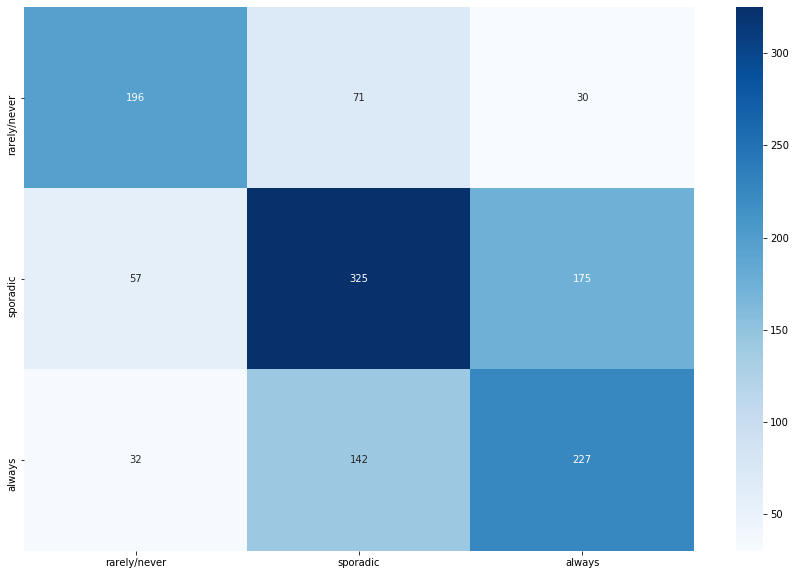

In [100]:
index = ['rarely/never', 'sporadic', 'always']  
columns = ['rarely/never', 'sporadic', 'always']  
cm_df = pd.DataFrame(cm,columns,index)                      
pyplot.figure(figsize=(15,10))  
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues') #annot=True to annotate cells

In [101]:
# accuracy of the model
diagonal_sum = cm.trace()
sum_of_all_elements = cm.sum()
accuracy = (diagonal_sum / sum_of_all_elements) *100;
print('Model accuracy is',accuracy)

Model accuracy is 59.601593625498005
